In [1]:
%cd ~/dv/sns-chops/resolution/ARCS/
import os, numpy as np

/SNS/users/lj7/dv/sns-chops/resolution/ARCS


In [3]:
import numpy as np
import scipy as sp

# PyChop

In [4]:
configfile = 'PyChop/arcs-09122018.yaml'
chopper1 = 'ARCS-700-1.5-SMI'
chopper1_highres = 'ARCS-700-0.5-AST'
chopper2 = 'ARCS-100-1.5-SMI'

In [6]:
choppers = [chopper1, chopper1_highres, chopper2]

In [15]:
expdatafiles = [
    './V_Cali_Int_Res_FC1_2018_v2.dat',
    './V_Cali_Int_Res_FC1_HighRes_2018_v2.dat',
    './V_Cali_Int_Res_FC2_2018_v2.dat'
]

In [5]:
import sys
sys.path.insert(0, "/SNS/users/lj7/dv")
from PyChop import PyChop2

In [9]:
sys.path.insert(0, os.path.abspath('./PyChop/'))

In [10]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from '/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop/Vdata2018.pyc'>

# Explore Chopper 1

\# RunNumber Energy Ei Chopper Chopper1 Chopper2 Chopper3 Height FWHM Sigma Q

In [113]:
flux_scale = 2.6e2 * 1e-6

In [ ]:
import warnings

In [125]:
%%time
chopper = choppers[0]
expdatafile = expdatafiles[0]
expdata = Vdata2018.ExpData(expdatafile)
unique_nominal_Eis = set( list(expdata.Ei_list)) 

rows = []
counter = 0
for Ei in unique_nominal_Eis:
    Energy = Ei
    # find chopper freqs
    condition = np.isclose(expdata.vdata.Energy, Ei)
    freqs = set(expdata.chopper_freqs[condition])
    # chopper
    Chopper = choppers.index(chopper) + 1
    Chopper1 = Chopper2 = Chopper3 = 0.
    # pychop tool
    instrument = PyChop2(configfile, chopper)
    instrument.ei = Ei
    for freq in freqs:
        code = 'Chopper%d = %s' % (Chopper, freq)
        exec(code)
        # calculate
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            FWHM, Height = instrument.getResFlux(Etrans=0., Ei_in=Ei, frequency=freq)
            FWHM = FWHM[0]
            Height = Height[0]
        Height *= flux_scale
        Center = Ei
        Sigma = FWHM / 2.355
        Q = 0.
        counter += 1
        row = [0, counter, Energy, Ei, 
              Chopper, Chopper1, Chopper2, Chopper3,
              Height, FWHM, Sigma,
              Q]
        rows.append(row)
    continue

reading data. please wait...
  done
CPU times: user 3.97 s, sys: 94.2 ms, total: 4.07 s
Wall time: 10.7 s


\# RunNumber Energy Ei Chopper Chopper1 Chopper2 Chopper3 Height FWHM Sigma Q

In [126]:
np.savetxt("PyChop_Int_Res_FC1_2018.dat", rows,
           header='RunNumber Energy Ei Chopper Chopper1 Chopper2 Chopper3 Height FWHM Sigma Q')

In [92]:
more PyChop_Int_Res_FC1_2018.dat

## Check

In [116]:
import pandas as pd

In [128]:
pychopdata = Vdata2018.ExpData("PyChop_Int_Res_FC1_2018.dat")

reading data. please wait...
  done


In [131]:
Ei = 700.

In [120]:
%matplotlib notebook

In [121]:
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


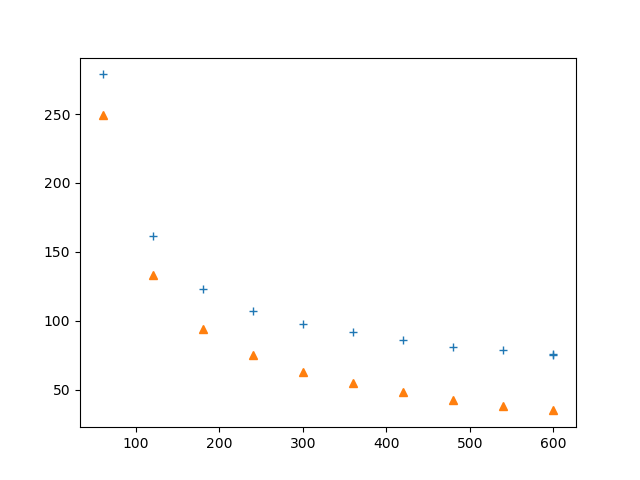

In [132]:
plt.figure()
condition = np.isclose(expdata.vdata.Energy, Ei)
freqs = expdata.chopper_freqs[condition]
fwhm = expdata.FWHM[condition]
plt.plot(freqs, fwhm, '+')

condition = np.isclose(pychopdata.vdata.Energy, Ei)
freqs2 = pychopdata.chopper_freqs[condition]
fwhm2 = pychopdata.FWHM[condition]
plt.plot(freqs2, fwhm2, '^')

<IPython.core.display.Javascript object>


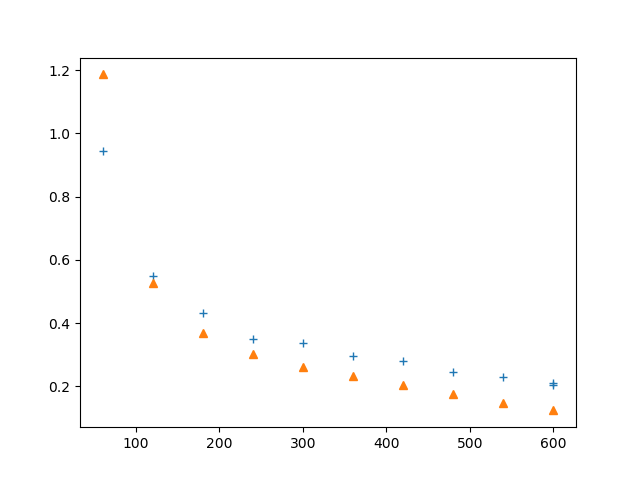

In [133]:
plt.figure()
condition = np.isclose(expdata.vdata.Energy, Ei)
freqs = expdata.chopper_freqs[condition]
i = expdata.intensity[condition]
plt.plot(freqs, i, '+')

condition = np.isclose(pychopdata.vdata.Energy, Ei)
freqs2 = pychopdata.chopper_freqs[condition]
i2 = pychopdata.intensity[condition]
plt.plot(freqs2, i2, '^')

# Chopper 1 High Res

In [134]:
%%time
chopper = choppers[1]
expdatafile = expdatafiles[1]
expdata = Vdata2018.ExpData(expdatafile)
unique_nominal_Eis = set( list(expdata.Ei_list)) 

rows = []
counter = 0
for Ei in unique_nominal_Eis:
    Energy = Ei
    # find chopper freqs
    condition = np.isclose(expdata.vdata.Energy, Ei)
    freqs = set(expdata.chopper_freqs[condition])
    # chopper
    Chopper = choppers.index(chopper) + 1
    Chopper1 = Chopper2 = Chopper3 = 0.
    # pychop tool
    instrument = PyChop2(configfile, chopper)
    instrument.ei = Ei
    for freq in freqs:
        code = 'Chopper%d = %s' % (Chopper, freq)
        exec(code)
        # calculate
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            FWHM, Height = instrument.getResFlux(Etrans=0., Ei_in=Ei, frequency=freq)
            FWHM = FWHM[0]
            Height = Height[0]
        Height *= flux_scale
        Center = Ei
        Sigma = FWHM / 2.355
        Q = 0.
        counter += 1
        row = [0, counter, Energy, Ei, 
              Chopper, Chopper1, Chopper2, Chopper3,
              Height, FWHM, Sigma,
              Q]
        rows.append(row)
    continue

reading data. please wait...
  done
CPU times: user 1.71 s, sys: 13.3 ms, total: 1.72 s
Wall time: 5.09 s


In [135]:
np.savetxt("PyChop_Int_Res_FC1_HighRes_2018.dat", rows,
           header='RunNumber Energy Ei Chopper Chopper1 Chopper2 Chopper3 Height FWHM Sigma Q')

# Chopper 2

In [136]:
%%time
chopper = choppers[2]
expdatafile = expdatafiles[2]
expdata = Vdata2018.ExpData(expdatafile)
unique_nominal_Eis = set( list(expdata.Ei_list)) 

rows = []
counter = 0
for Ei in unique_nominal_Eis:
    Energy = Ei
    # find chopper freqs
    condition = np.isclose(expdata.vdata.Energy, Ei)
    freqs = set(expdata.chopper_freqs[condition])
    # chopper
    Chopper = choppers.index(chopper) + 1
    Chopper1 = Chopper2 = Chopper3 = 0.
    # pychop tool
    instrument = PyChop2(configfile, chopper)
    instrument.ei = Ei
    for freq in freqs:
        code = 'Chopper%d = %s' % (Chopper, freq)
        exec(code)
        # calculate
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            FWHM, Height = instrument.getResFlux(Etrans=0., Ei_in=Ei, frequency=freq)
            FWHM = FWHM[0]
            Height = Height[0]
        Height *= flux_scale
        Center = Ei
        Sigma = FWHM / 2.355
        Q = 0.
        counter += 1
        row = [0, counter, Energy, Ei, 
              Chopper, Chopper1, Chopper2, Chopper3,
              Height, FWHM, Sigma,
              Q]
        rows.append(row)
    continue

reading data. please wait...
  done
CPU times: user 2.1 s, sys: 10.6 ms, total: 2.11 s
Wall time: 3.45 s


In [137]:
np.savetxt("PyChop_Int_Res_FC2_2018.dat", rows,
           header='RunNumber Energy Ei Chopper Chopper1 Chopper2 Chopper3 Height FWHM Sigma Q')